**TASK 02**

**Data Cleaning and Exploratory Data Analysis(EDA) on Titanic dataset**

Exploratory Data Analysis: Exploratory Data Analysis involves visually exploring data sets to identify patterns and deviations, using techniques like histograms, box plots, and cluster analysis, to gain insights and formulate new research questions in an inductive manner. (Soruce: https://www.sciencedirect.com/topics/social-sciences/exploratory-data-analysis#definition)

Dataset obtained from: https://www.kaggle.com/competitions/titanic/data?select=train.csv

Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")

In [4]:
df = pd.read_csv("/content/sample_data/titanic.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Checking for missing values

In [8]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)

<ipython-input-9-4232182175>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-9-4232182175>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [10]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Checking for duplicate values

In [11]:
df.duplicated().sum()

np.int64(0)

Feature Engineering

In [12]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [13]:
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

In [14]:
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
     'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Mlle',\
     'Ms', 'Mme'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

Exploratory Data Analysis(EDA)

1) Univariate Analysis: (single variables)

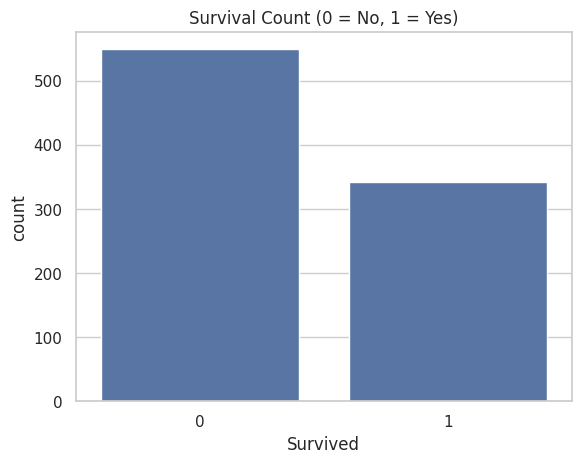

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [15]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()
print(df['Survived'].value_counts(normalize=True))

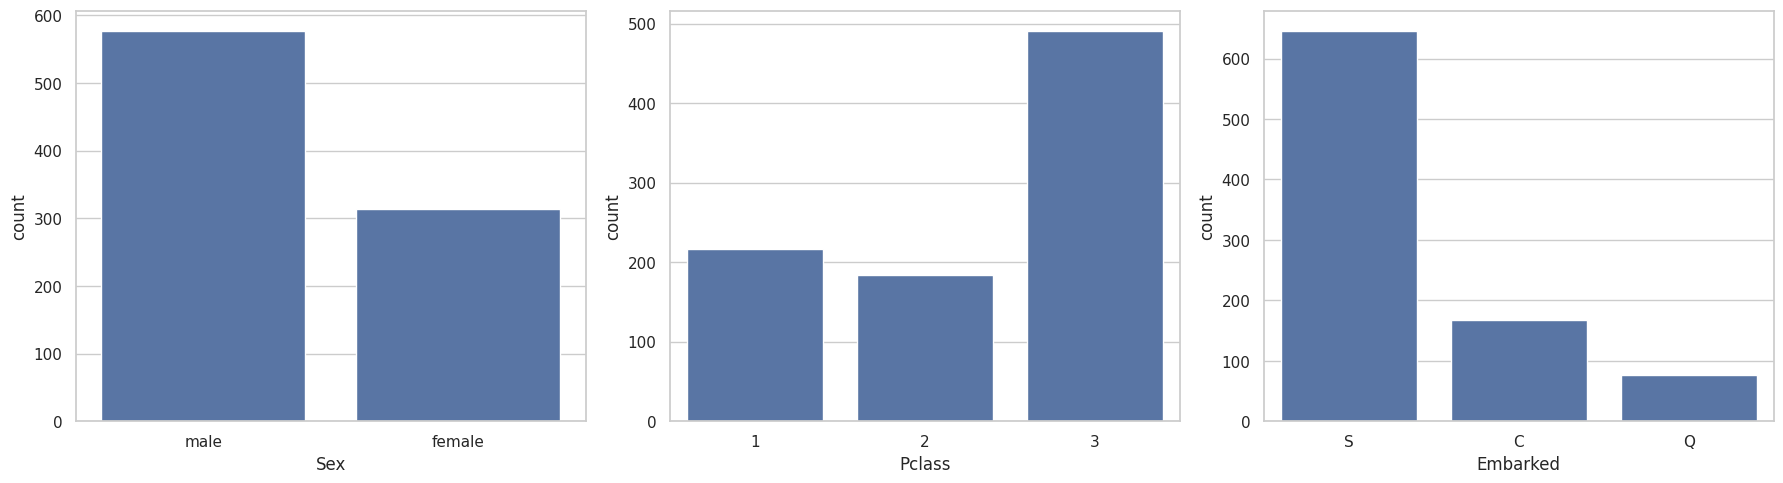

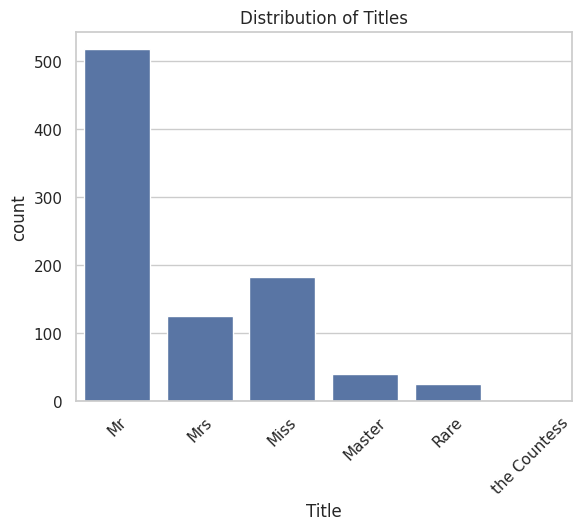

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(x='Sex', data=df, ax=axes[0])
sns.countplot(x='Pclass', data=df, ax=axes[1])
sns.countplot(x='Embarked', data=df, ax=axes[2])
plt.tight_layout()
plt.show()

sns.countplot(x='Title', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Titles')
plt.show()

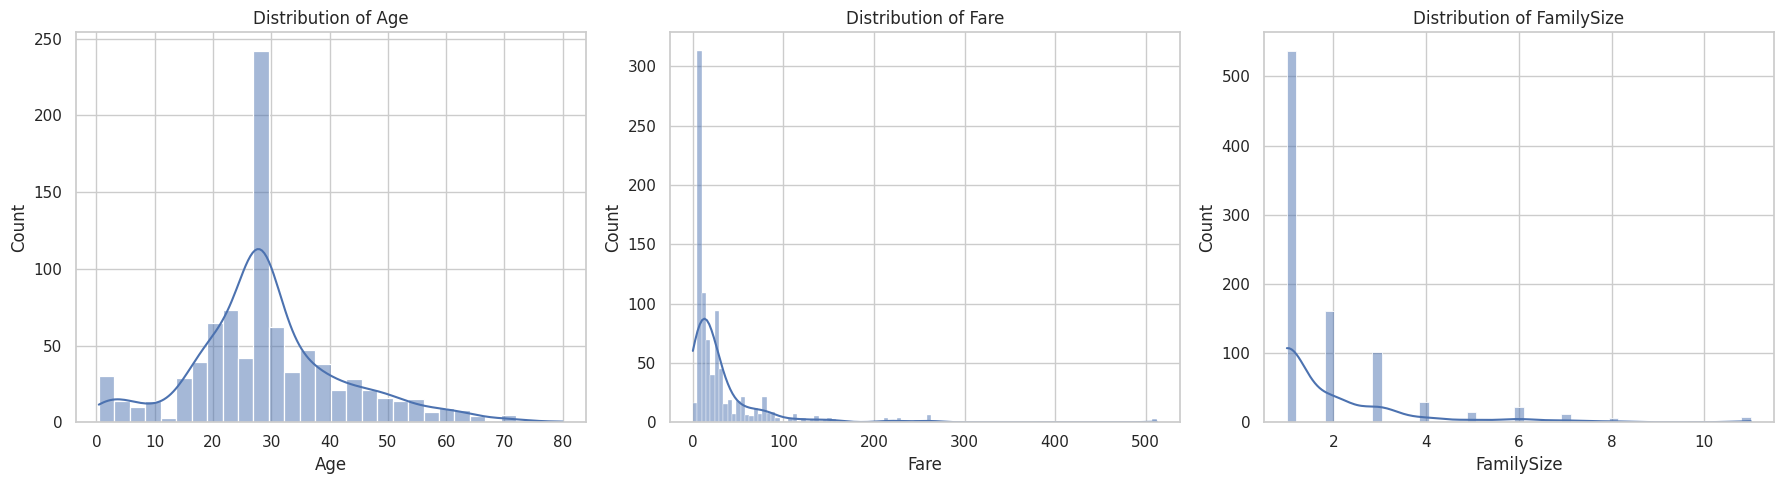

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['Age'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Age')
sns.histplot(df['Fare'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Fare')
sns.histplot(df['FamilySize'], kde=True, ax=axes[2])
axes[2].set_title('Distribution of FamilySize')
plt.tight_layout()
plt.show()

2) Bivariate analysis: (two variables)

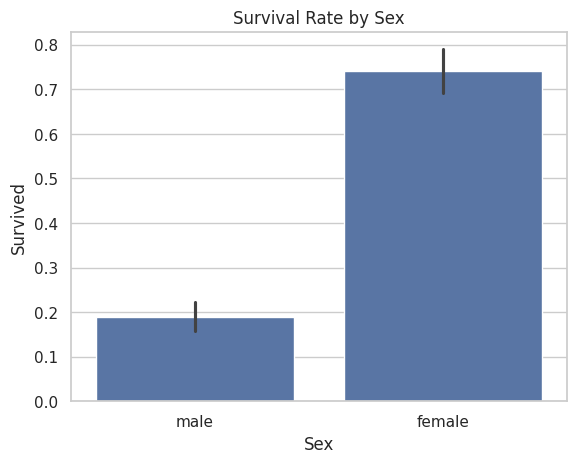

In [18]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

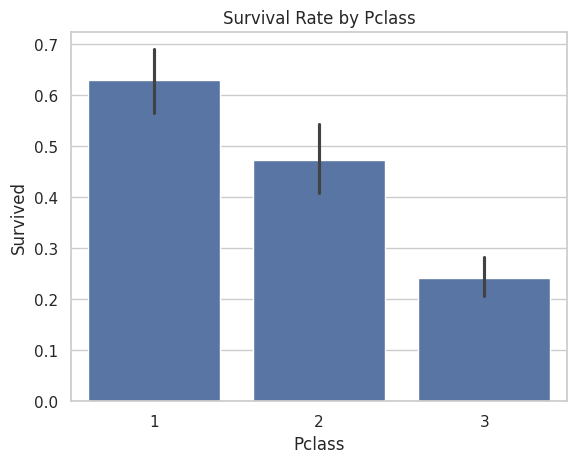

In [19]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Pclass')
plt.show()

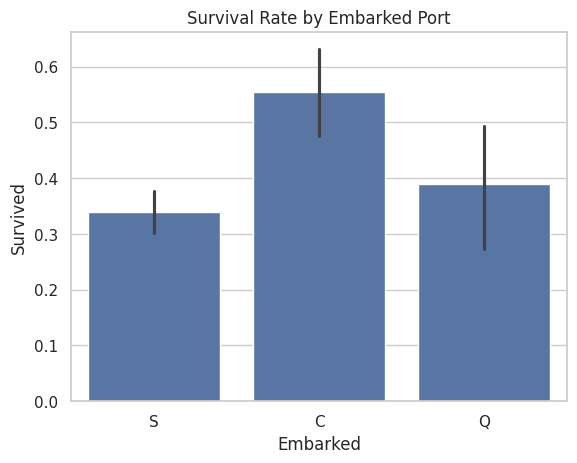

In [20]:
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarked Port')
plt.show()

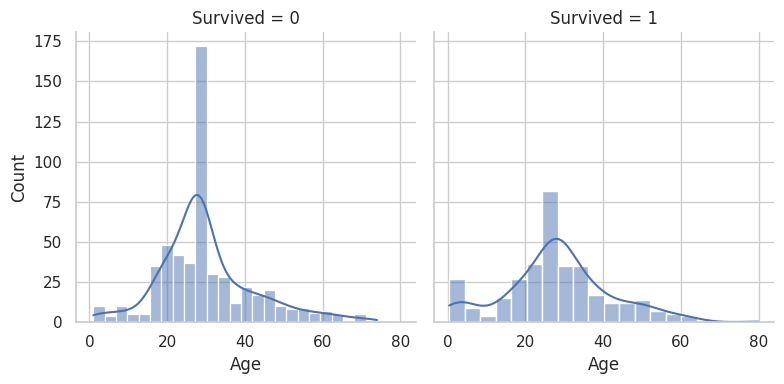

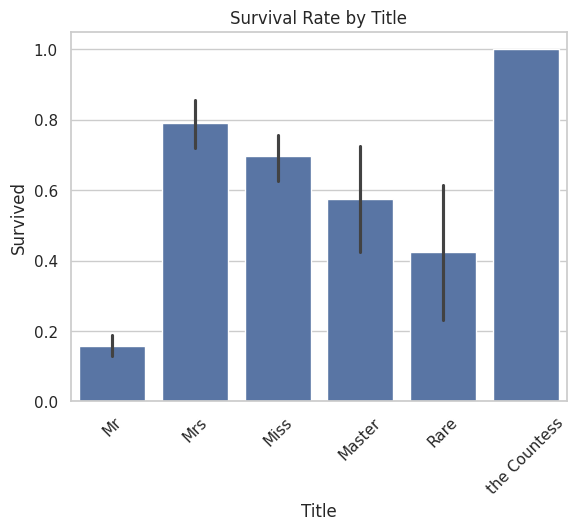

In [21]:
g = sns.FacetGrid(df, col='Survived', height=4, aspect=1)
g.map(sns.histplot, 'Age', kde=True)
plt.show()

sns.barplot(x='Title', y='Survived', data=df)
plt.xticks(rotation=45)
plt.title('Survival Rate by Title')
plt.show()


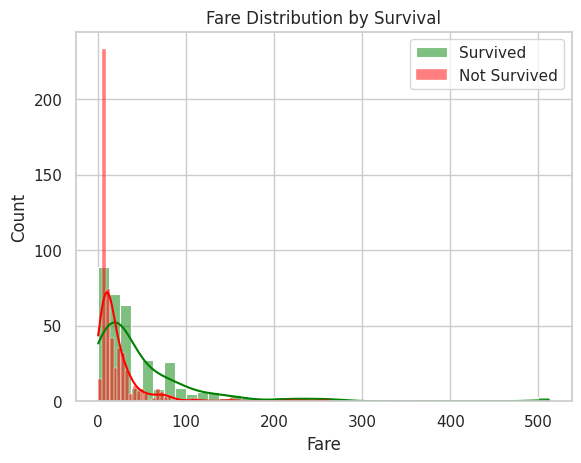

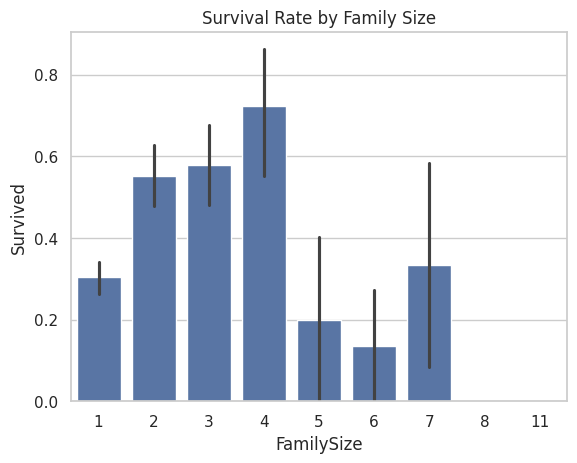

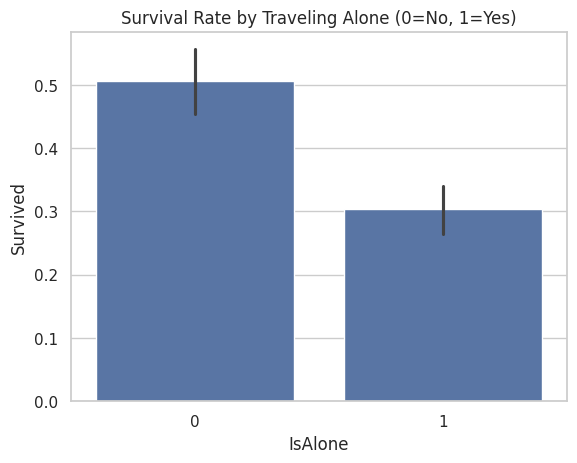

In [22]:
sns.histplot(df[df['Survived']==1]['Fare'], color='green', label='Survived', kde=True)
sns.histplot(df[df['Survived']==0]['Fare'], color='red', label='Not Survived', kde=True)
plt.legend()
plt.title('Fare Distribution by Survival')
plt.show()
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.show()

sns.barplot(x='IsAlone', y='Survived', data=df)
plt.title('Survival Rate by Traveling Alone (0=No, 1=Yes)')
plt.show()


3) Multivariate Analysis: (three or more variables)

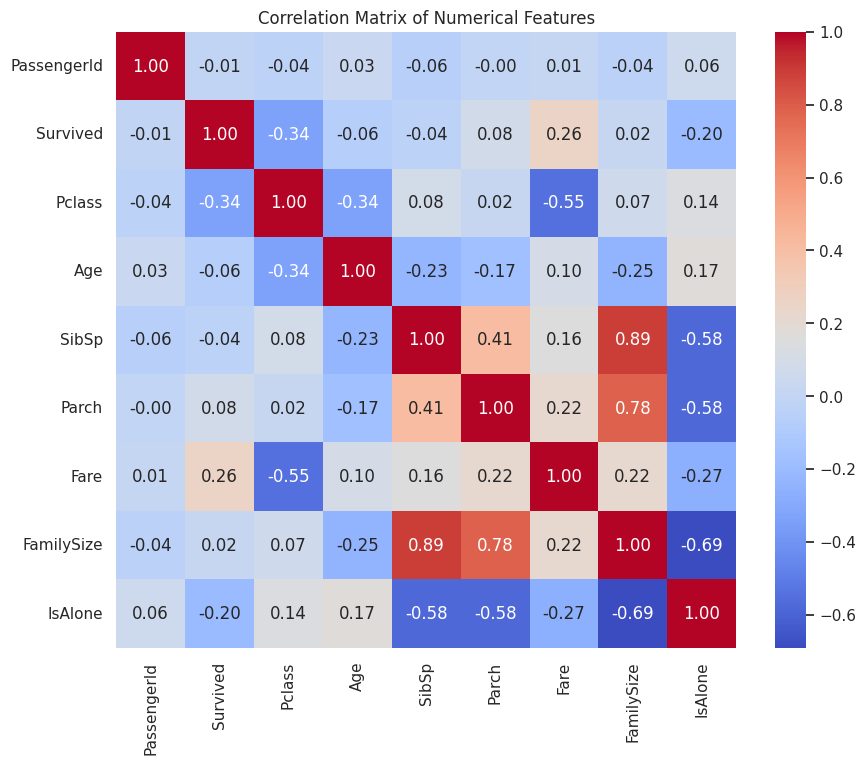

In [23]:
numeric_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


**Observation:**

1) Women had a significantly higher survival rate than men, likely due to the "women and children first" policy.

2) Passengers in 1st class had a much higher survival rate compared to 2nd and 3rd class passengers, suggesting that wealth or social standing played a role.

3) Children (especially very young ones) often had a higher chance of survival.

4) Traveling with a small family (e.g., 2-4 people) seemed to offer a better chance of survival than traveling alone or in very large groups.

5) Certain titles (like 'Master' for young boys, 'Mrs' for married women) showed higher survival rates, reinforcing age and gender patterns.

